# Capstone II : Step 3 Exploratory Data Analysis

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
os.getcwd()

'C:\\Users\\Pranay\\Projects\\GitHub\\Capstone_II'

In [3]:
df=pd.read_csv('data/step2_output.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
indexNames = df[(df.marital == 'unknown')].index
df.drop(indexNames , inplace=True)
df.shape

(40779, 20)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40779.0,39.917212,10.322977,17.000,32.000,38.000,47.000,98.000
campaign,40779.0,2.566100,2.768402,1.000,1.000,2.000,3.000,56.000
pdays,40779.0,962.669315,186.432789,0.000,999.000,999.000,999.000,999.000
previous,40779.0,0.060668,0.358945,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40779.0,0.083536,1.568912,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40779.0,93.575809,0.577950,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40779.0,-40.516737,4.621969,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,40779.0,3.623094,1.732926,0.634,1.344,4.857,4.961,5.045
nr.employed,40779.0,5167.157277,72.122679,4963.600,5099.100,5191.000,5228.100,5228.100


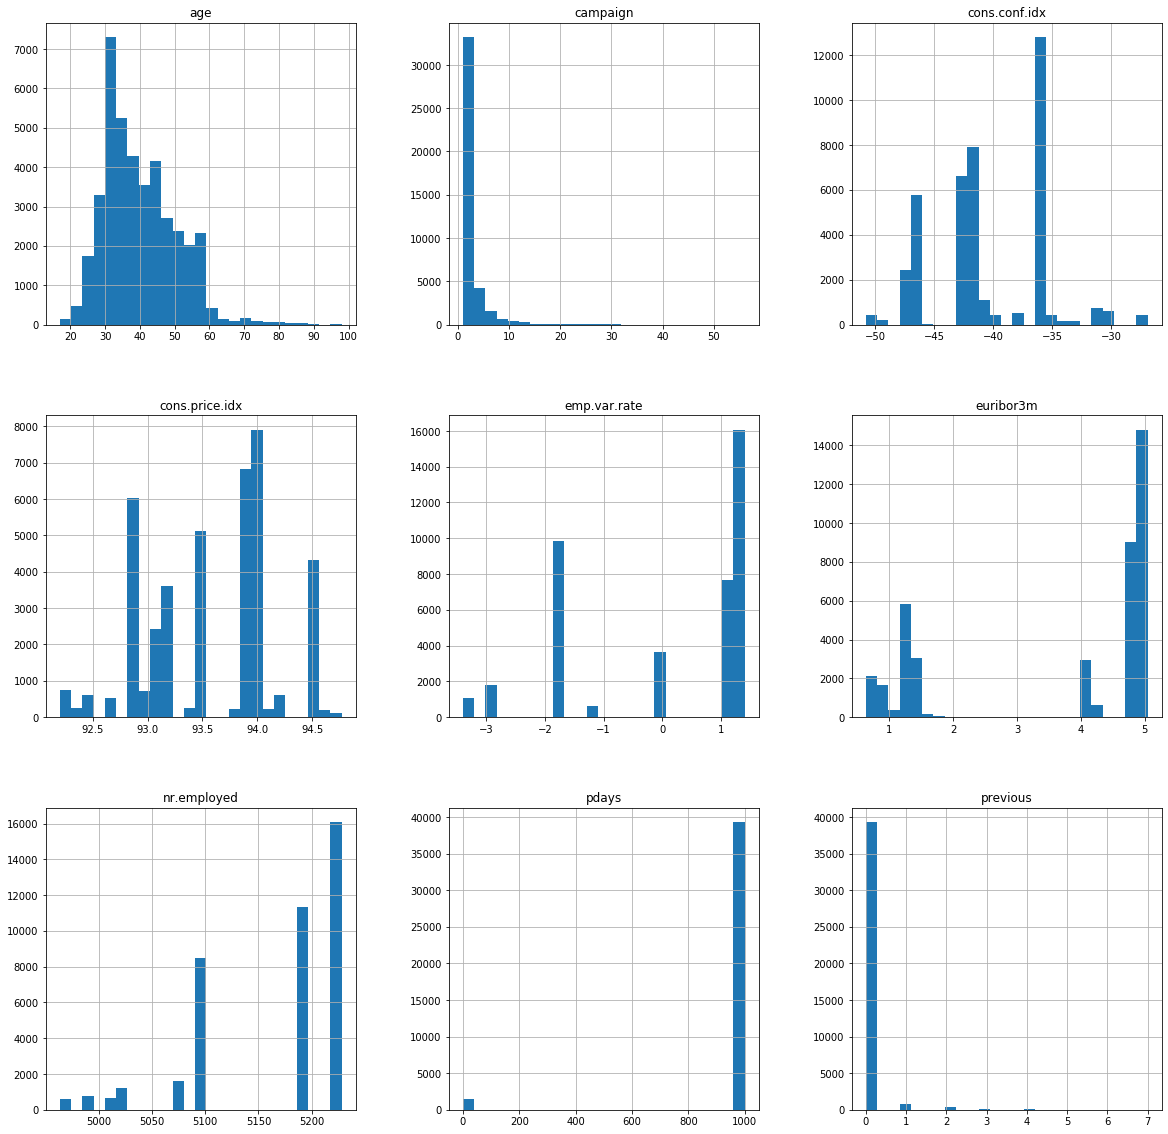

In [6]:
hist = df.hist(bins=25,figsize =(20,20))

In [7]:
mari=list(df.marital.value_counts().index)
jobli=list(df.job.value_counts().index)
educa=list(df.education.value_counts().index)
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
dfyes=df[df['y']=='yes']

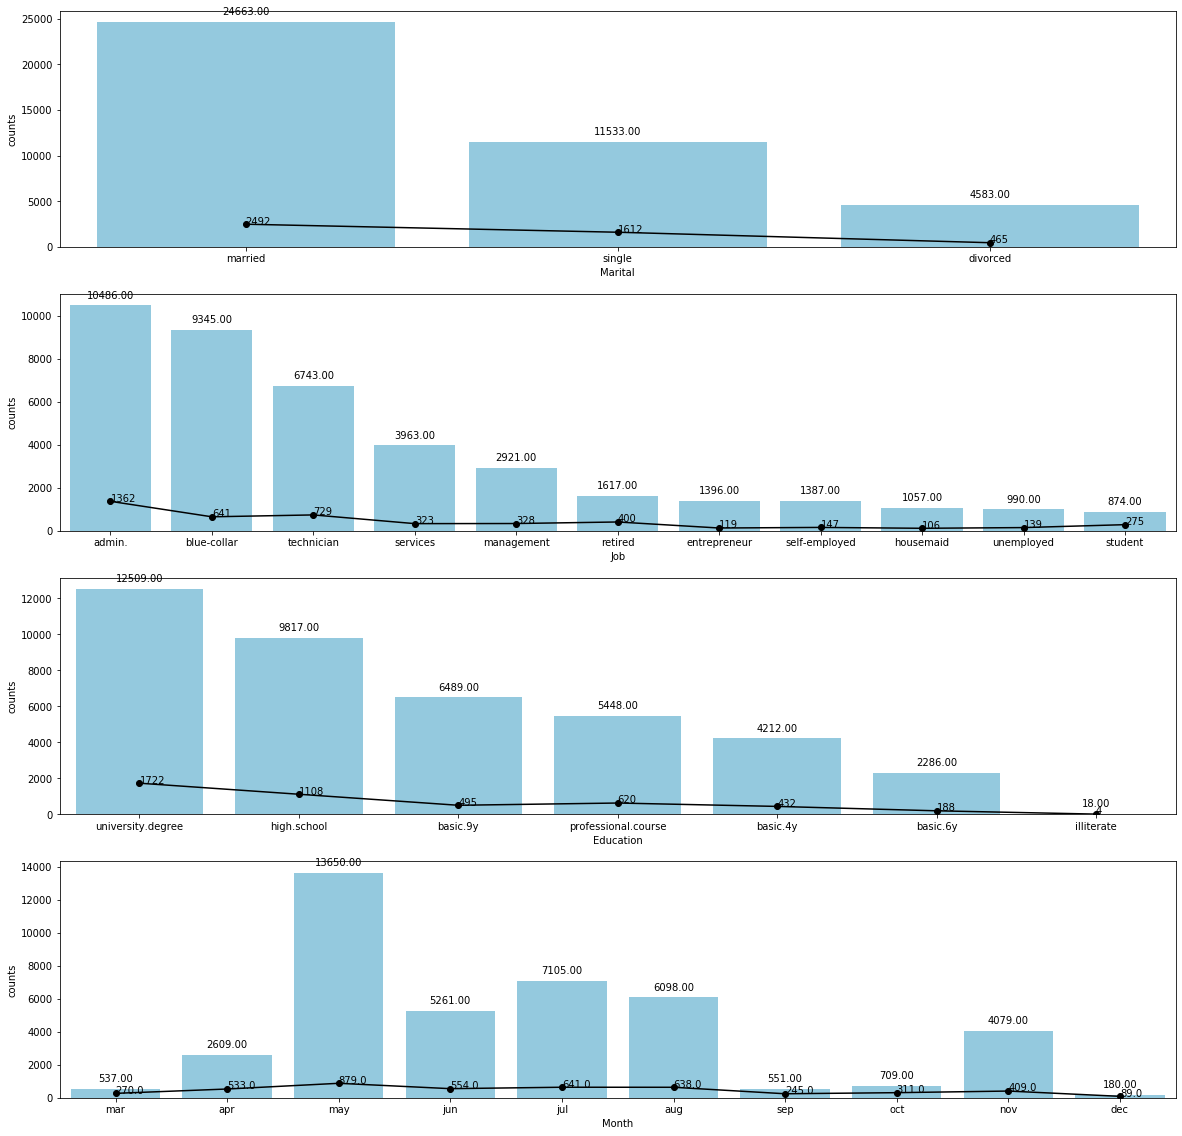

In [8]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(20, 20))
x_1 = pd.DataFrame(df.marital.value_counts()).reindex(mari, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.marital)
x_2 = pd.DataFrame(dfyes.marital.value_counts()).reindex(mari, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.marital)
ax1.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax1.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax1)
splot.set(xlabel= 'Marital', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')

x_1 = pd.DataFrame(df.job.value_counts()).reindex(jobli, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.job)
x_2 = pd.DataFrame(dfyes.job.value_counts()).reindex(jobli, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.job)
ax2.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax2.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax2)
splot.set(xlabel= 'Job', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.education.value_counts()).reindex(educa, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.education)
x_2 = pd.DataFrame(dfyes.education.value_counts()).reindex(educa, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.education)
ax3.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax3.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax3)
splot.set(xlabel= 'Education', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
x_1 = pd.DataFrame(df.month.value_counts()).reindex(months, axis=0).dropna()
names_1 = list(x_1.index)
values_1 = list(x_1.month)
x_2 = pd.DataFrame(dfyes.month.value_counts()).reindex(months, axis=0).dropna()
names_2 = list(x_2.index)
values_2 = list(x_2.month)
ax4.plot(names_2,values_2,linestyle='-', marker='o',color = 'black')
for i, txt in enumerate(values_2):
    ax4.annotate(txt, (names_2[i], values_2[i]))  
splot=sns.barplot(x=names_1, y=values_1,color = 'skyblue',palette=None,ax=ax4)
splot.set(xlabel= 'Month', ylabel='counts')
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va ='center', xytext = (0, 10), textcoords = 'offset points')
        
                        

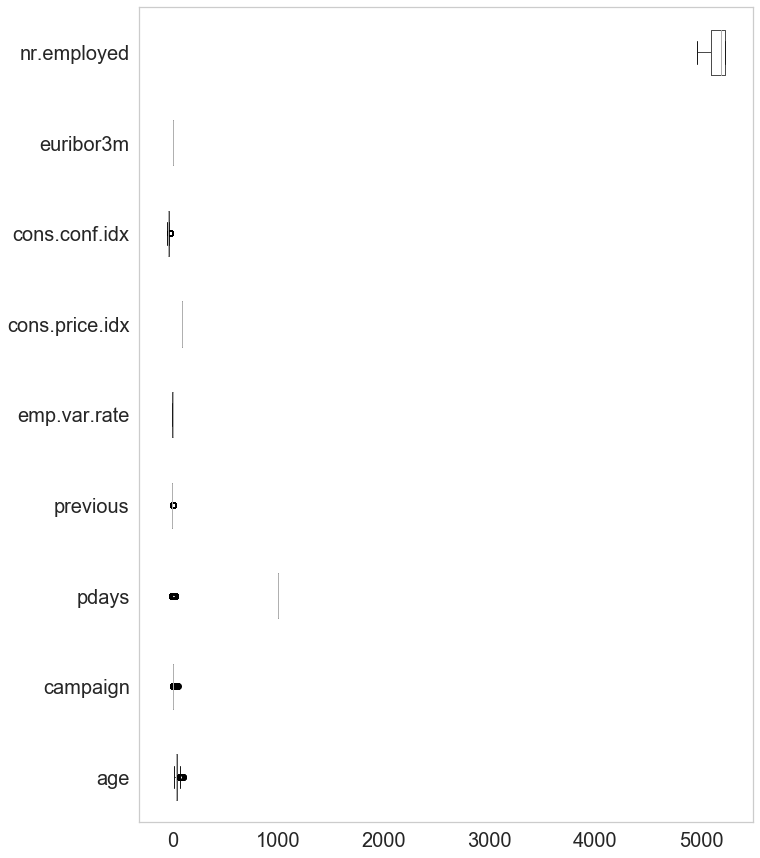

In [9]:
sns.set(rc={'figure.figsize':(11,15)}, font_scale=2.5, style='whitegrid')
boxplot = df.boxplot(grid=False, vert=False,fontsize=20)

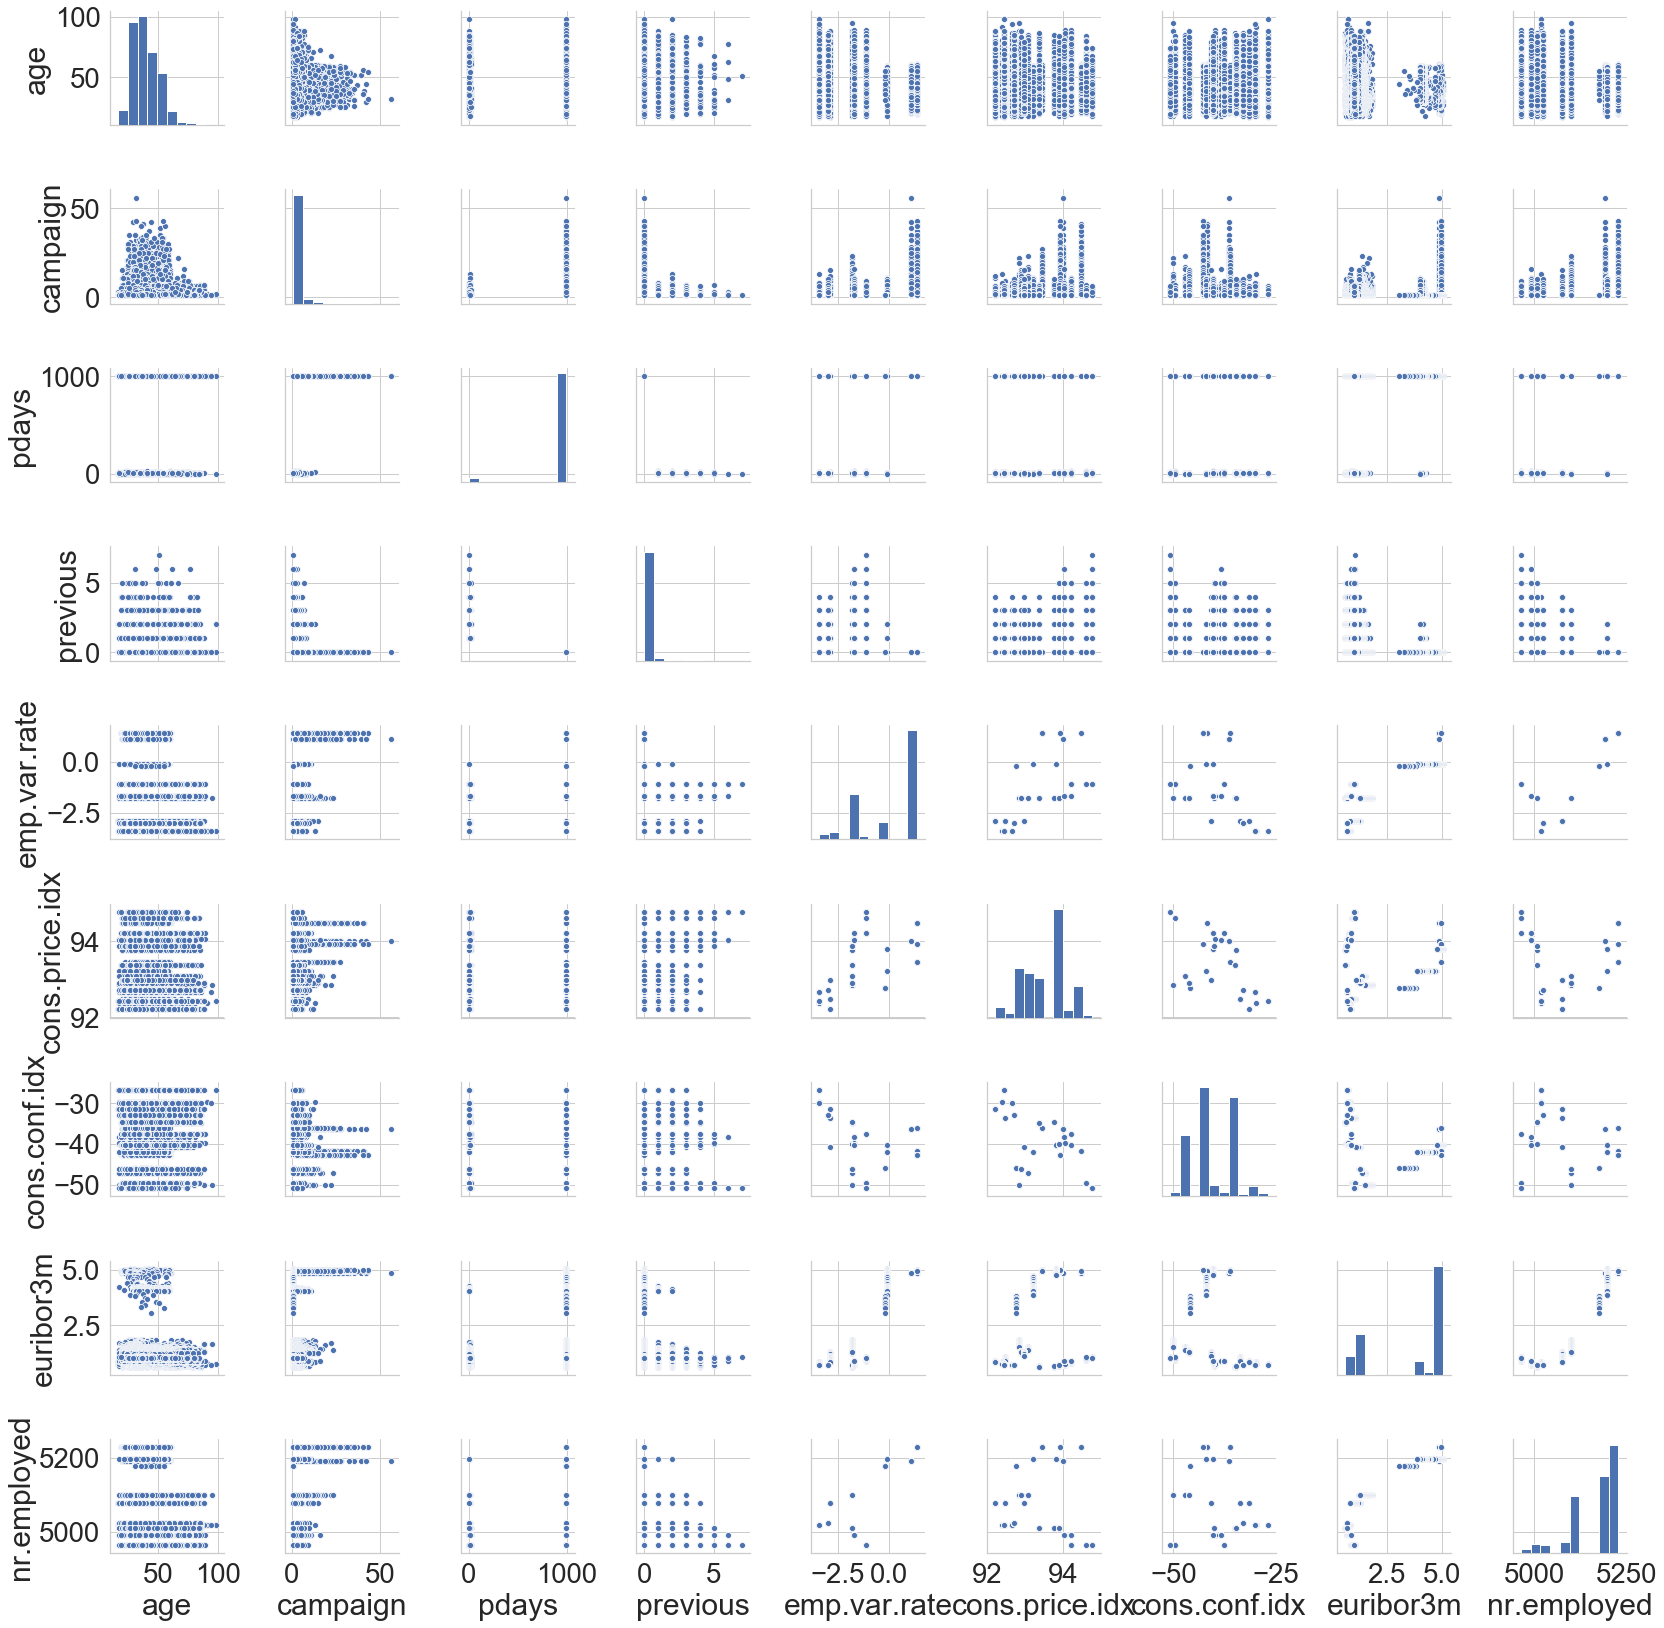

In [10]:
g = sns.pairplot(df)

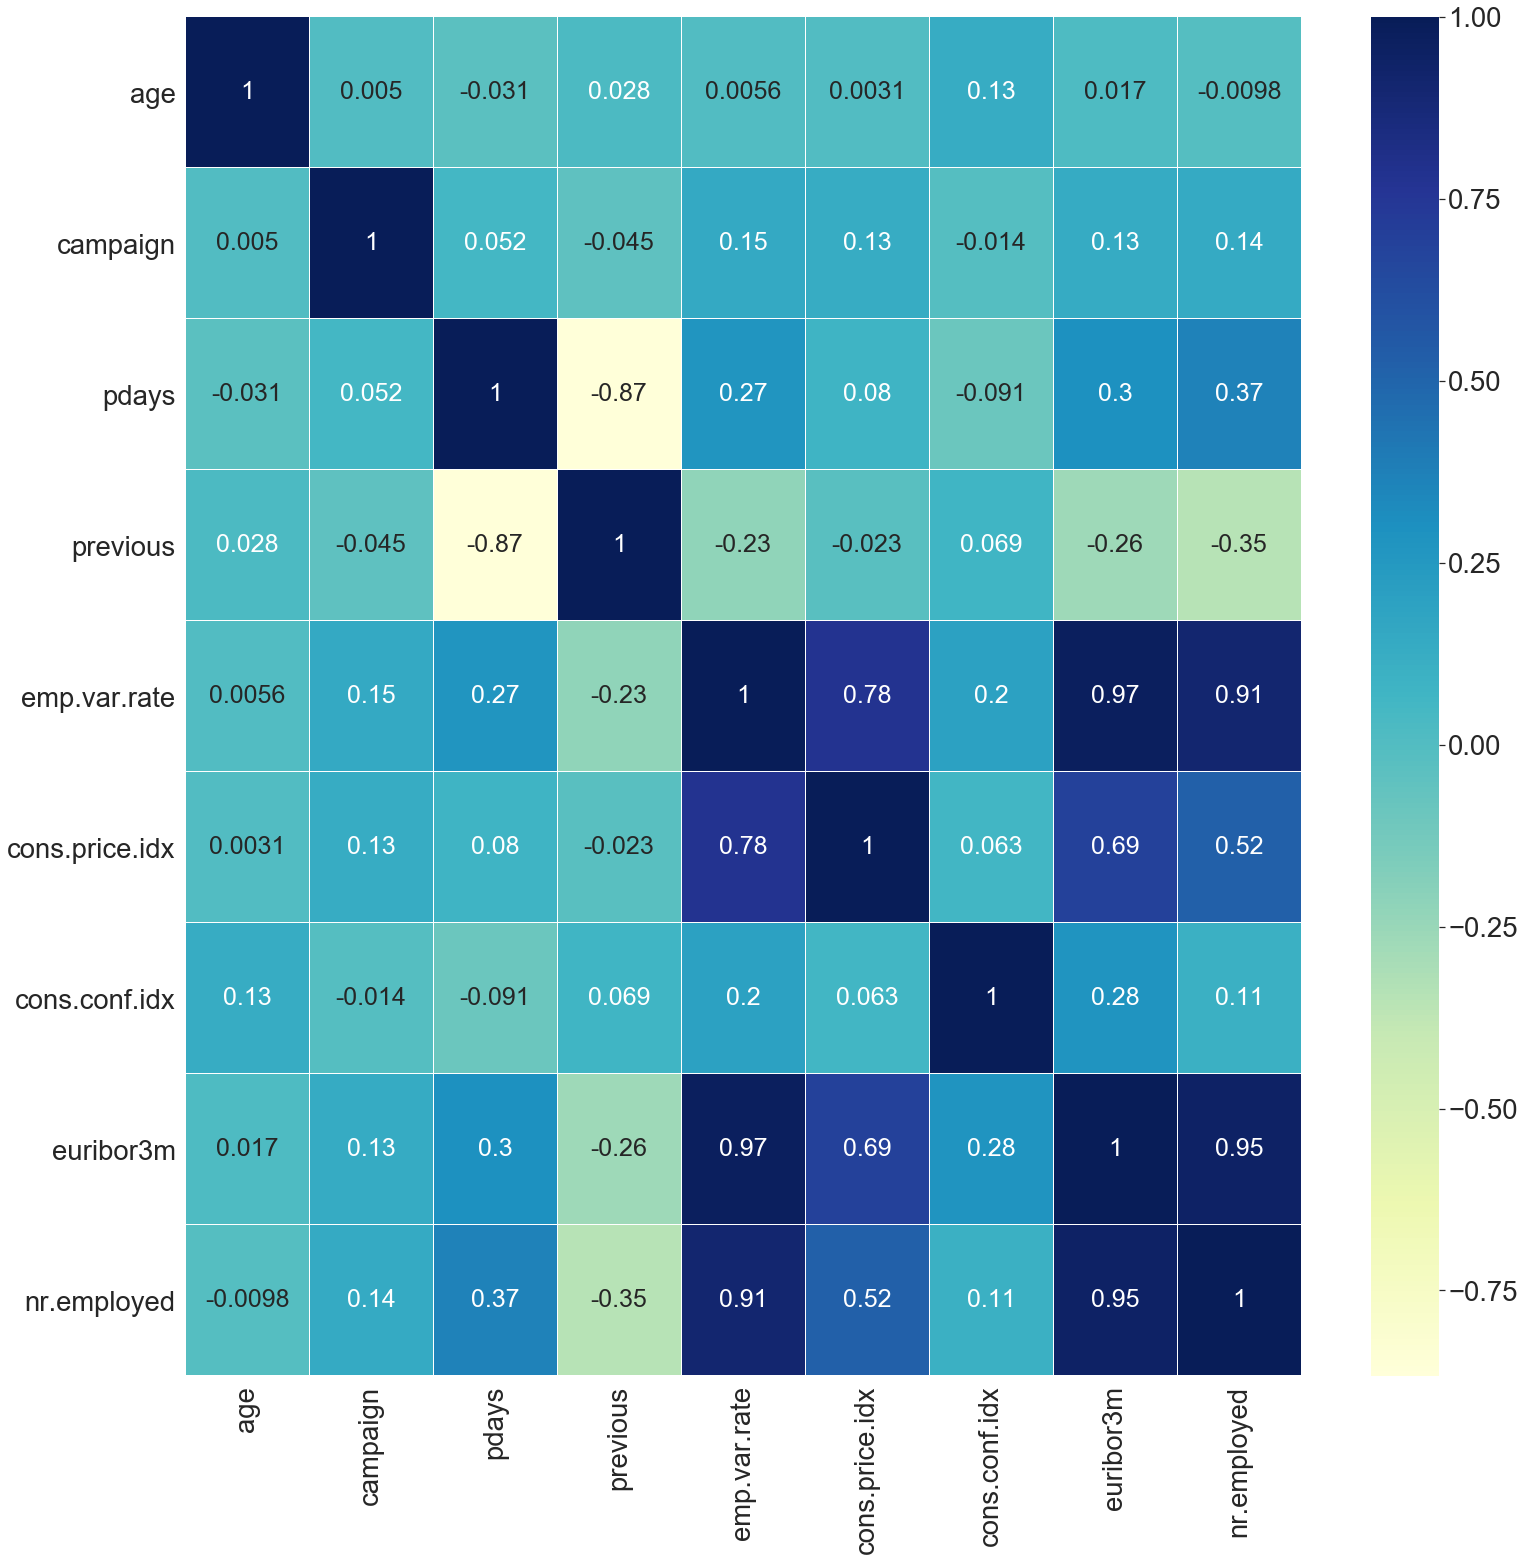

In [11]:
# Make a heatmap of the data 
#create the correlation matrix heat map
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),linewidths=0.1,cmap="YlGnBu", annot=True,annot_kws={"fontsize":25})
plt.yticks(rotation=0);

In [12]:
#objList = df.select_dtypes(include = "object").columns
#print (objList)

In [13]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#for feat in objList:
#    df[feat] = le.fit_transform(df[feat].astype(str))

#print (df.info())

In [14]:
# Make a heatmap of the data 
#create the correlation matrix heat map
#plt.figure(figsize=(30,30))
#sns.heatmap(df.corr(),linewidths=0.1,cmap="YlGnBu", annot=True,annot_kws={"fontsize":25})
#plt.yticks(rotation=0);

In [15]:
#inverse_transform_lambda = lambda x: le[x.name].inverse_transform(x)

In [16]:
#df.apply(inverse_transform_lambda)

In [17]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#for feat in objList:
#    df[feat] = le.inverse_transform(df[feat])

#print (df.info())

In [18]:
with_subscription=df.loc[df['y']=='yes']['age']
without_subscription=df.loc[df['y']=='no']['age']

In [19]:
print('Number of records having insurance',with_subscription.shape)
print('Number of records not having insurance',without_subscription.shape)

Number of records having insurance (4569,)
Number of records not having insurance (36210,)


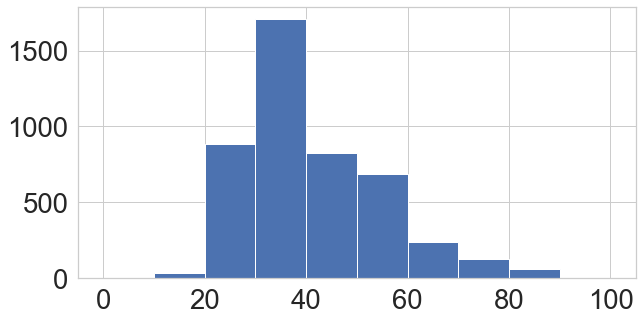

In [20]:
plt.figure(figsize=(10,5))
splot = plt.hist(with_subscription, bins = [0,10,20,30,40,50, 60, 70,80,90, 100])

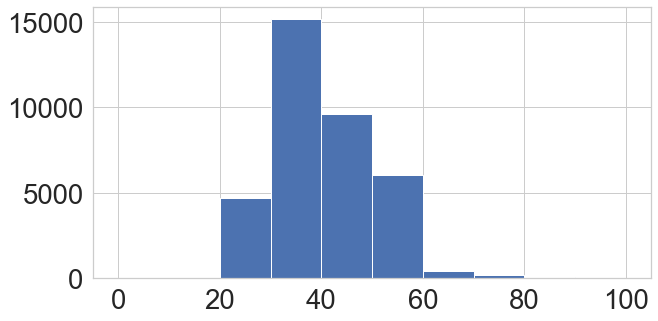

In [21]:
plt.figure(figsize=(10,5))
_ = plt.hist(without_subscription, bins = [0,10,20,30,40,50, 60, 70,80,90, 100])

<B>H0: People with subscription and without subscription are aged equally</B><br>
<B>H1: People with subscription and without subscription are not aged equally

In [22]:
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(with_subscription, without_subscription,equal_var=True)

In [23]:
print('T-test statistic is',t_stat)

T-test statistic is 4.82282474185669


In [24]:
p_val=p_val/2
print('P value is',"%.10f" % p_val)

P value is 0.0000007102


In [25]:
df.to_csv('data/step3_output.csv',index=False)